<center><img src='https://drive.google.com/uc?export=view&id=12CrUdXDAiltLBT26sG7HZ_HciIhvGyT8'></center>

<!--[image.png](attachment:image.png) -->

# Wstęp do uczenia maszynowego - Notebook 5, version for students
**Author: Dorota Celińska-Kopczyńska, Michał Ciach, Marcin Sydow**

## Description


In today's class, we will learn how to perform linear regression. It is a method of fitting a linear function to a data set with a single predicted numerical variable $Y$ and several explanatory variables (a.k.a. predictors or independent variables) stored in a matrix $X$. The model of linear regression can be written as:
$$Y = X\beta + \epsilon,$$
where $X$ is the matrix of independent variables and $\epsilon$ is random disturbance -- the effect of factors influencing the value of $Y$ that are not included in $X$ (the unexplained part in our model). This effect is sometimes called an *error*, but note that it is a slightly misleading name.

For now, we do not talk about the diagnostics of the model -- we will introduce it during the next classes.

In [ ]:
!pip install gdown
!pip install --upgrade gdown
!gdown https://drive.google.com/uc?id=1RVvicALeTV8lGG9k8oWBP3F_Ef0QChTo
!gdown https://drive.google.com/uc?id=1kfec3jtuCKVAZln50eLg-ARPHLHUYyuy
!gdown https://drive.google.com/uc?id=1F7SE13FXj14W-y1IT6uxQdrbA4LAp2nS
!gdown https://drive.google.com/uc?id=1GJ89Sa63gPMd9clUxip7NrnXOgI64QE7

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1RVvicALeTV8lGG9k8oWBP3F_Ef0QChTo
To: /content/5. BDL municipality area km2 2015-2020.csv
100% 180k/180k [00:00<00:00, 90.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kfec3jtuCKVAZln50eLg-ARPHLHUYyuy
To: /content/5. BDL municipality incomes 2015-2020.csv
100% 228k/228k [00:00<00:00, 97.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1F7SE13FXj14W-y1IT6uxQdrbA4LAp2nS
To: /content/5. BDL municipality population 2015-2020.csv
100% 222k/222k [00:00<00:00, 94.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GJ89Sa63gPMd9clUxip7NrnXOgI64QE7
To: /content/5. wum_regression.csv
100% 23.5k/23.5k [00:00<00:00, 44.8MB/s]


## Data & library imports

This notebook will introduce another Python library for statistical data analysis. The `statsmodels` library implements several statistical tests and methods for linear regression.

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
from scipy.stats import norm, uniform
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Modelling with a linear regression model starts with the choice of the predictors. Ideally, one would choose the predictors and the model's functional form based on knowledge of the theoretical background. For example, if we were to model international trade with the so-called gravity equation (bilateral trade between two countries is proportional to their respective sizes, measured by their GDP, and inversely proportional to the geographic distance between them), we would know that we would use the GDPs in their raw (untransformed) form and the inverse of the geographic distance. However, suppose we have to deconstruct the model from the data. In that case, a good starting point is to investigate the scatterplots of the dependent variable ($y$ -- the response) against the independent variables ($X$ -- regressors, features, predictors).



**Excercise 1** Based on the scatterplots below, suggest a functional form for the model.

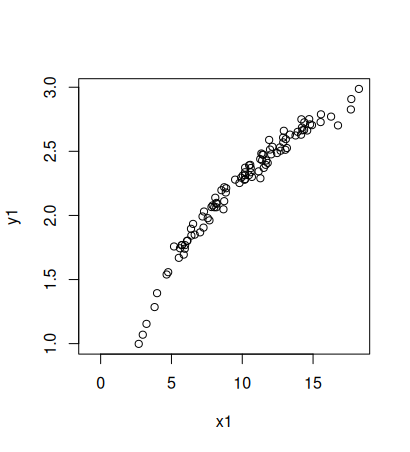
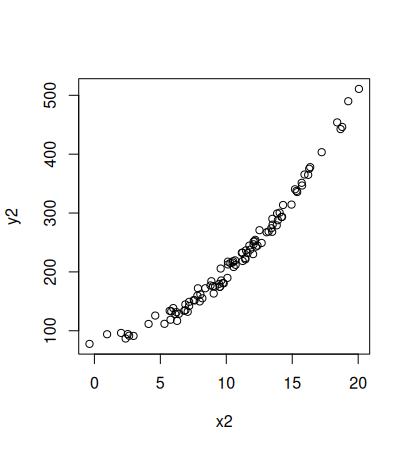
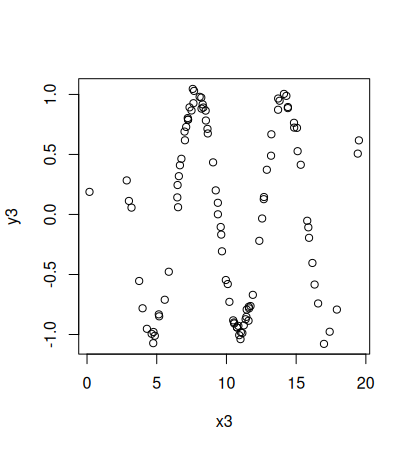
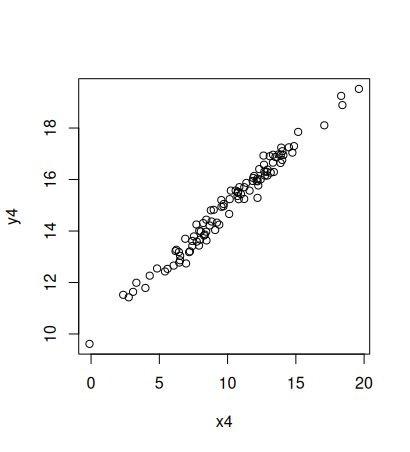

log, exp, sin, linear

**Excercise 2** In this exercise, we will learn how to estimate linear regression in Python. Load the file `5. wum_regression.csv` into a pandas data frame. This data set contains seven simulated variables.

In [ ]:
data = pd.read_csv("5. wum_regression.csv")
data.head()

,A,B,C,D,E,class,y
0,1.522700,19.205271,10.295255,11.171878,-3.358015,3,3.339731
1,-1.310197,26.401914,16.448596,11.735518,-3.589629,3,7.784282
2,-3.000131,21.451375,13.836870,11.940932,-3.759799,3,4.244369
3,-0.675606,17.281028,16.342905,12.261367,-4.412917,3,2.729655
4,-1.523891,19.108423,20.595732,12.455387,-2.817553,3,2.161327


**Exercise 2a** Estimate the linear regression model, treating `y` as the dependent variable (response) and `A, B, C, D, E` and constant (intercept) as the independent variables (regressors, features). Print the summary of the results of the procedure.

*Note:* See the documentation for ordinary least squares (OLS) linear regression [statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) for the details of the syntax and [statsmodels.regression.linear_model.RegressionResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults) for `summary` method.

In [ ]:
X = data[['A', 'B', 'C', 'D', 'E']]
Y = data[['y']]

X = sm.add_constant(X) # Dlaczego dodajemy stałą? Musimy mieć macierz ze stałą?
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     314.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           4.88e-97
Time:                        19:49:59   Log-Likelihood:                -440.96
No. Observations:                 222   AIC:                             893.9
Df Residuals:                     216   BIC:                             914.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9303      0.627      4.675      0.0

**Exercise 2b** Using the previous task log, familiarize yourself with its content. Pay special attention to the estimates of the coefficient, tests of the individual statistical significance, a test of the joint statistical significance, and `R^2`. Are the coefficients jointly significant?

**Note:** This is intended as a demonstration task with an explanation by the tutors.

In [ ]:
# Małe p-value -> duża istotność współczynnika?
# Małe p dla F statistics -> model dopasowania jest istotny?
# R-squared -> Czy to jest duży wynik?
# Na co warto jeszcze zwrócić uwagę?

**Exercise 2c** Using the log, intepret the value of the $R^2$. Provide the interpretation of the individually significant coefficients. Assume 1% significance level.

In [ ]:
# The R^2 value of 0.879 means that approx. 87.9% of the variance in the dependent variable y can be explained by the
# independent variables 'A', 'B', 'C', 'D' and 'E' in the model.

# Jak zinterpretować te wsp i do czego to 1%? Chodzi o wartość p<0.01 w każdym z przypadków?

**Exercise 2d** Compute the vector of the [fitted values](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.fittedvalues.html) (predicted values) and [the residuals](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.resid.html). Investigate their descriptive statistics. Scatterplot the fitted values against the original dependent variable.


In [ ]:
print("fitted values:")
print(results.fittedvalues.describe())

print("residuals:")
print(results.resid.describe())

fitted values:
count    222.000000
mean       5.666638
std        4.770047
min       -3.796059
25%        2.039491
50%        5.694640
75%        8.444119
max       20.356500
dtype: float64
residuals:
count    2.220000e+02
mean     4.736952e-15
std      1.767568e+00
min     -5.692428e+00
25%     -1.055088e+00
50%     -9.036293e-02
75%      1.361213e+00
max      4.037490e+00
dtype: float64


In [ ]:
scatter_data = pd.DataFrame({'Fitted Values': results.fittedvalues.values, 'Original Y': Y['y']})
fig = px.scatter(scatter_data, y='Fitted Values', x='Original Y',
                 title='Scatterplot of Fitted Values vs. Original Dependent Variable',
                 labels={'Fitted Values': 'Fitted Values', 'Original Y': 'Original Dependent Variable (Y)'})
fig.show()


**Exercise 2e* -- another way to build a model** Instead of building the data frames with necessary variables, you may prefer to use "R-like" formulas to build the model, as in the example below.

Read more here: https://www.statsmodels.org/stable/example_formulas.html

Estimate the model from this exercise using this approach.

In [ ]:
mod = smf.ols(formula='y ~ A + B + C + D + E', data=data)
res = mod.fit()
print(res.summary())

NameError: name 'smf' is not defined

**Exercise 3 - categorical variables** The previous task contained just the *numerical variables*. However, our regression model may contain *categorical data*. Those variables contain label values rather than numeric values on which we can do arithmetic operations. The number of possible values is often limited to a fixed set. Categorical variables are often called *nominal*. Our dataset contains a variable class (with four levels) that we will treat as categorical in this exercise.

The dataset contains a categorical variable `class` in integer encoding -- each level of the categorical variable was assigned a numerical symbol. If we kept this encoding and performed a linear regression model, that variable would be treated as a numerical one with some natural order, and each level would contribute similarly to the result (just as in the standard interpretation). This could result in poor performance or unexpected results (predictions halfway between categories). If we assume that the levels impact the response differently, we need to decode the categorical variable using a one-hot encoding.

In one-hot encoding, the integer encoded variable is removed, and a new binary variable is added for each unique integer value. For the variable `class`, we will have four binary (dummy) variables.

Beware! If you put all the decoded levels of the categorical variable AND an intercept in your model, you will encounter a dummy variable trap. Theoretically, such a model should not be estimated successfully (the $X^TX$ becomes impossible to invert); however, unfortunately, Python somehow computes an estimate. Such a situation is called *perfect multicollinearity* and is a serious flaw in your model.

**Exercise 3a -- One-hot-encoding**. Decode the class variable with one-hot encoding. Use the [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method from the pandas data frame. Remove one of the levels (e.g., the first one with `drop_first=True`) to avoid the dummy variable trap. Rename the levels as `class_i`, where $i$ is the numeric symbol from the integer encoding for the level. E.g., if the original level was decoded with 4, the corresponding binary variable would be called `class_4`.

In [ ]:
# Dlaczego usuwamy class_1?

In [ ]:
data_class = data.join(pd.get_dummies(data['class'],drop_first=True, prefix='class', dtype=float))
data_class.head()

,A,B,C,D,E,class,y,class_2,class_3,class_4
0,1.522700,19.205271,10.295255,11.171878,-3.358015,3,3.339731,0.0,1.0,0.0
1,-1.310197,26.401914,16.448596,11.735518,-3.589629,3,7.784282,0.0,1.0,0.0
2,-3.000131,21.451375,13.836870,11.940932,-3.759799,3,4.244369,0.0,1.0,0.0
3,-0.675606,17.281028,16.342905,12.261367,-4.412917,3,2.729655,0.0,1.0,0.0
4,-1.523891,19.108423,20.595732,12.455387,-2.817553,3,2.161327,0.0,1.0,0.0


**Exercise 3b -- OLS with dummies**. Perform the linear model for `y` using `A`, `B`, `C`, `D`, `E`, intercept, and decoded class variable. Interpret the individually significant coefficients for levels of the categorical variable. Assume 1% significance level.

In [ ]:
mod = smf.ols(formula='y ~ A + B + C + D + E + class_2 + class_3 + class_4', data=data_class)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     210.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.29e-96
Time:                        19:50:00   Log-Likelihood:                -433.09
No. Observations:                 222   AIC:                             884.2
Df Residuals:                     213   BIC:                             914.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0870      0.647      3.227      0.0

In [ ]:
# Duże p-value przy class_4 co to oznacza?

**Exercise 3c -- removing a categorical variable from the model** In many models you may encounter a problem that not all coefficients for the categorical variable levels would be individually significant. If you want to remove such a variable (or any group of variables) from your model, you should perform a joint insignificance test (Wald test). Using [`wald_test()`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.wald_test.html), check if you should remove the decoded class variable from the model.

**Wald test** is an example of a statistical test of a joint hypothesis. Assume, we want to check if $\beta_1$, $\beta_2$, and $\beta_3$ are jointly insignificant. The null hypothesis $H_0: \beta_1 = 0 \wedge \beta_2 = 0 \wedge \beta_3 = 0$ against the alternative: $H_1: \beta_1 \neq 0 \lor \beta_2 \neq 0 \lor \beta_3 \neq 0$.

In [ ]:
wald_res = res.wald_test('(class_2 = 0), (class_3 = 0), (class_4 = 0)', scalar=True)
print(wald_res)

<F test: F=5.216105602033701, p=0.0017045526199111361, df_denom=213, df_num=3>


**Exercise 4—Anscombe quartet** $R^2$ should help us assess our model's quality. While a low value of this measure may encourage us to rework our model, unfortunately, a high value of $R^2$ is not enough to say we work with a good model. This exercise shows one of the weaknesses of this measure—it may not be beneficial if we work with non-linear relationships.

The data below contains Anscombe's quartet -- a famous collection comprising four datasets with nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate the importance of graphing data when analyzing it, as well as the effect of outliers and other influential observations on statistical properties.

In [ ]:
#@title data import
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]
x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]

datasets = pd.DataFrame({
    'X1': x1,
    'Y1': y1,
    'X2': x2,
    'Y2': y2,
    'X3': x3,
    'Y3': y3,
    'X4': x4,
    'Y4': y4
})

**Exercise 4a** Construct four linear models in the form $y_i \sim x_i$ where $i \in \{1,2,3,4\}$. Include intercepts! Compare and interpret the coefficients of determination ($R^2$) for those models.

In [ ]:
for i in range(1, 5):
  mod = smf.ols(formula=f'Y{i} ~ X{i}', data=datasets)
  res = mod.fit()
  print(res.rsquared)

0.666542459508775
0.6662420337274844
0.6663240410665593
0.6667072568984652


**Exercise 4b** Scatterplot $y_i$ and $x_i$  where $i \in \{1,2,3,4\}$ and add the fitted regression lines to the plots. Do you think those models are of high quality? Is the quality of the models the same?

In [ ]:
for i in range(1, 5):
  fig = px.scatter(datasets, x=f'X{i}', y=f'Y{i}', trendline="ols")
  fig.show()

## Forecasting

**Exercise 5**. In this exercise, we will learn how to use linear regression for forecasting. Load the "diabetes" dataset using the `load_diabetes` function from the `sklearn.datasets` module (similarly as for the classification tasks during previous classes).

In [ ]:
diabetes = sklearn.datasets.load_diabetes()

In [ ]:
diabetes.data.shape

(442, 10)

**Exercise 5a** Split the diabetes data into train and test, then the train part into partial train and validation. Check if the shapes of the obtained datasets look ok.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(diabetes.data, diabetes.target, test_size=0.2)
xptrain, xval, yptrain, yval = train_test_split(xtrain, ytrain)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
print(xptrain.shape, xval.shape, yptrain.shape, yval.shape)

(353, 10) (89, 10) (353,) (89,)
(264, 10) (89, 10) (264,) (89,)


**Exercise 5b** Fit a linear regression model on the diabetes data. Use all the available features; decoding categorical variables is optional here. Print summary. Evaluate the results of the model using RMSE. To get the prediction, use the [predict()](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.predict.html#statsmodels.regression.linear_model.OLSResults.predict) method on the object that stores the results of the regression fitting.

*Note* There are also other standard evaluation measures for regression, e.g., MAE (see: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics )

In [ ]:
X = xtrain
Y = ytrain
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.098
Model:                            OLS   Adj. R-squared (uncentered):              0.072
Method:                 Least Squares   F-statistic:                              3.737
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                    8.84e-05
Time:                        19:56:09   Log-Likelihood:                         -2293.7
No. Observations:                 353   AIC:                                      4607.
Df Residuals:                     343   BIC:                                      4646.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Exercise 5c** A typical approach while evaluating a model is to compare the values of its evaluation measures against a naive (extremely simple) benchmark model. Let us use the mean of the dependent (target) variable on the training set as our naive benchmark model. Evaluate this model and compare it against the model from Exercise 5b. Which one is better?

*Note:* Recall, we want to minimize the RMSE.

In [ ]:
ypred = results.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest, ypred))

y_mean = np.mean(ytrain)
ypred_naive = np.full(shape=ytest.shape, fill_value=y_mean)

rmse_naive = np.sqrt(mean_squared_error(ytest, ypred_naive))

rmse, rmse_naive

(166.04480261177406, 78.27843219367338)

**Exercise 5d (optional)** Simplify the linear model, removing as large set of variables with jointly insignificant coefficients as possible using *general to specific* modeling. Include the intercept. Evaluate the improved model against the naive model.

**Note:** In *general to specific* modeling, we simplify the model by imposing joint restrictions on the values of the coefficients. We start with a model containing a large number of variables (the general -- *unrestricted* model). Then, with joint insignificance tests (Wald tests), we build the set of variables that can be excluded from the model. Their coefficients are jointly insignificant, so we build a specific -- *restricted* model. Typically, we build the set of restrictions based on the p-values in t-tests (sorted in decreasing order). We add the restrictions to our null hypothesis until we reject it. The set of variables we could remove from our model is described by the last set of restrictions for which we have not rejected the null hypothesis about the joint insignificance.

Assume we have a model $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \varepsilon$. The p-values in t-tests for the coefficients are $[0.001, 0.34, 0.013, 0.50]$. We notice that for $\beta_1$ and $\beta_3$, we support the null hypothesis about the individual insignificance in t-tests at every reasonable significance level. For $\beta_2$, the conclusion depends on the significance level. We want to simplify the model according to general to specific modeling.

First we conduct the Wald test with the $H_0: \beta_3 = 0 \wedge \beta_1 = 0$ agains $H_1: \beta_3 \neq 0 \lor \beta_1 \neq 0$. We obtain a p-value of 0.67, greater than any reasonable significance level (we support the null hypothesis). Second, we conduct the Wald test with the $H_0: \beta_3 = 0 \wedge \beta_1 = 0 \wedge \beta_2 = 0$ agains $H_1: \beta_3 \neq 0 \lor \beta_1 \neq 0 \lor \beta_2 \neq 0$ (the sorting of the restriction does not matter, it is mostly for our convenience). We obtain a p-value equal to 0.001, which is lower than any reasonable significance level (we reject the null hypothesis). The set of variables that we could exclude from the model based on this approach would be ${x_1, x_3}$, and the resulting (simplified) model $ y = \beta_0 + \beta_2 x_2 + \varepsilon$.

General to specific is similar to *backward* feature selection method.

In [ ]:
# put your code here

## **For the curious (\*\*)**: examples of other models based on OLS

**Exercise 6 -- KNN regression\*\*** We may combine regression with k-nearest neighbors. Note that such a model may be valuable for predictions but will not be readily interpretable.

In KNN regression, the target is predicted by locally interpolating the targets associated with the nearest neighbors in the training set.

**Exercise 6a\*\*** Use the split of the data from Exercise 5. Create, fit, and evaluate with RMSE a K-nn regressor on the diabetes data (assume $k=3$). See documentation for [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) for syntax details.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
results = neigh.fit(xtrain, ytrain)

ypred = results.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest, ypred))

rmse

58.12537570522798

**Exercise 6b\*\*** Regression, as classification is supervised learning; thus, any hyperparameters can be tuned (using validation data) similarly. Tune the $k$ hyperparameter of the K-nn regression model. Make a plot of RMSE as the function of $k$ and identify the most promising value of $k$.

Optimal k: 19 , Min RMSE:  52.51704164289291


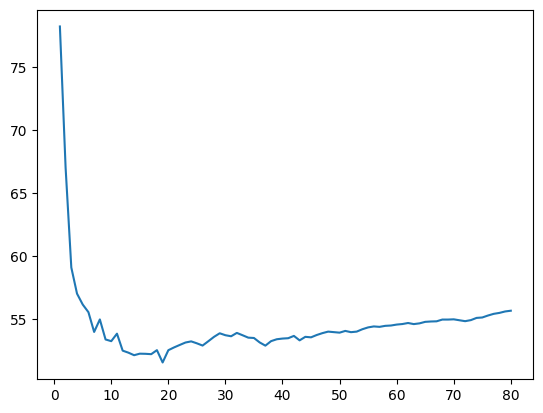

In [ ]:
import matplotlib.pyplot as plt

rmse = []
k_range = range(1, 81)
for k in k_range:
  neigh = KNeighborsRegressor(n_neighbors=k)
  results = neigh.fit(xptrain, yptrain)
  ypred = results.predict(xval)
  rmse.append(np.sqrt(mean_squared_error(ypred, yval)))

rmse = np.array(rmse)
k_opt = rmse.argmin() + 1
print("Optimal k:", k_opt, ", Min RMSE: ", rmse[k_opt])
plt.plot(k_range, rmse)
plt.show()

**Exercise 6c\*\*** Preprocessing the data, e.g., by normalizing it, may improve the performance of the regressor. On a single plot, make a graph of the dependence of RMSE as the function of $k$ (ranging from 1 to 80) for two variants:
1. not-normalized data (red)
1. data normalized with `StandardScaler` (green)

Can you see the improvement in the performance? Tou can try it with various random data splits.

Optimal k:  16 , Min RMSE:  52.376502417790185


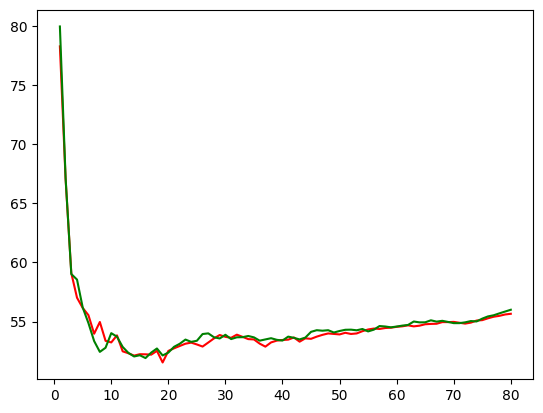

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

rmse = []
rmse_scaled = []
k_range = range(1, 81)
for k in k_range:
  neigh = KNeighborsRegressor(n_neighbors=k)
  results = neigh.fit(xptrain, yptrain)
  ypred = results.predict(xval)
  rmse.append(np.sqrt(mean_squared_error(ypred, yval)))

  pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors = k))])
  pipe.fit(xptrain, yptrain)
  ypred = pipe.predict(xval)
  rmse_scaled.append(np.sqrt(mean_squared_error(ypred, yval)))

rmse = np.array(rmse)
rmse_scaled = np.array(rmse_scaled)

k_opt = rmse_scaled.argmin() + 1
print("Optimal k: ", k_opt, ", Min RMSE: ", rmse_scaled[k_opt])
plt.plot(k_range, rmse, color='red')
plt.plot(k_range, rmse_scaled, color='green')

plt.show()

Optimal k: 8,  Min RMSE on validation data: 58.59603411763836


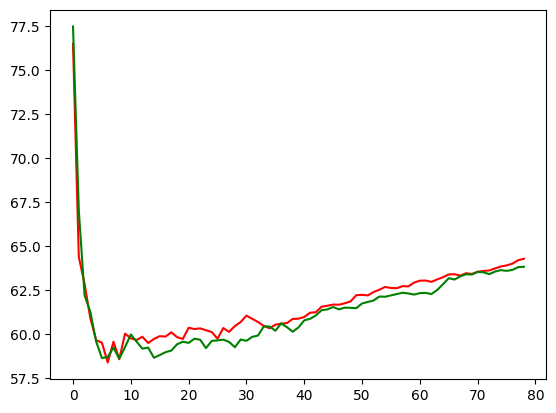

In [ ]:
# put your code here

**Exercise 6d\*\***  Finally, identify the optimum value of k, train the final model on the re-merged partial train (xptrain) and validation (xval) dataset, and print the final model's RMSE on the test data. Compare the results against the models from the previous Exercises.

In [ ]:
# put your code here

RMSE achieved by the optimal model on the test data: 56.96970045796746


**Exercise 7\*\* -- Spurious regression** OLS can be applied to modeling data characterized by a time component, e.g., time series or panel data. In such a case, some of the assumptions we introduced during this course will be violated and you may need to improve the model. Especially, there is a danger of obtaining the significant estimation results from unrelated data when series exhibit trends. Such case is called a *spurious regression*.

To illustrate the idea, we will independently generate two [*random walks*](https://en.wikipedia.org/wiki/Random_walk):

* $y_t = y_{t-1} + ɛ_t$
* $x_t = x_{t-1} + \eta_t$

Where $ɛ_t \sim N(0, \sigma^2_ɛ)$, and $\eta_t \sim N(0, \sigma^2_\eta)$.

**Exercise 7a\*\*** Generate $y_t$ and $x_t$ using [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) and [`np.cumsum()`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html). Assume number of observations $n= 100000$, $\sigma^2_ɛ = 1$, $\sigma^2_\eta = 4$. Set seed to 21202024 for replicability with [`np.random.seed()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html).

In [ ]:
# put your code here

(array([-5.14294640e-01, -4.36936398e+00, -8.55869654e+00, ...,
        -8.39360681e+02, -8.37825658e+02, -8.37272546e+02]),
 array([-4.16128217e-02,  1.78405286e+00,  3.51927856e+00, ...,
         3.06019952e+02,  3.06322989e+02,  3.05670827e+02]))

**Exercise 7b\*\*** Show the line plots of $y_t$ and $x_t$ in one plot. Scatterplot $y_t$ against $x_t$. Do you notice anything interesting? Recall that the series are simulated independently so there is no relation
between these variables.

Line plots


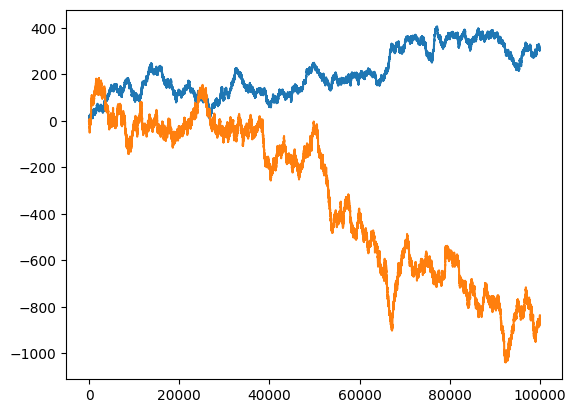

Scatterplot


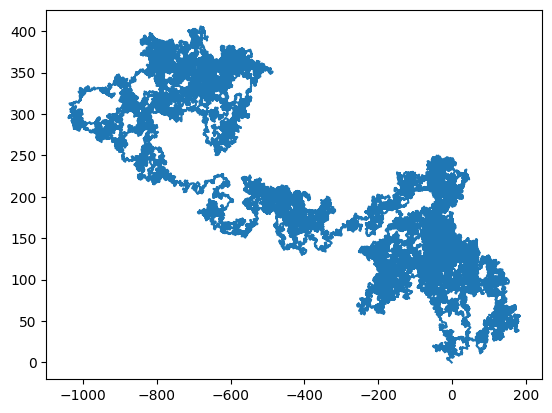

In [ ]:
# put your code here

**Exercise 7c\*\*** Estimate linear regression where $y_t$ is the dependent variable, and $x_t$ and the intercept are the independent variables. Investigate the $R^2$ and t-tests. Is there anything suspicious?

In [ ]:
# put your code here

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 2.213e+05
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:44:29   Log-Likelihood:            -5.4326e+05
No. Observations:              100000   AIC:                         1.087e+06
Df Residuals:                   99998   BIC:                         1.087e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.5598      0.248    498.035      0.0

**Exercise 8 Autodistributed Lag Model (ADL)\*\*** In this exercise, we will construct a regression model to explain the income of municipalities in 2017 (this is our dependent variable) based on the incomes from the years 2015 to 2016.

Actually, this model is hard to categorize. This resembles a simplified version of the ADL (*autoregressive distributed lags*) model on panel data , where the value of $y$ at time $t$ is explained by lags of $x$ ($x_t$, $x_{t-1}$, ... -- part of DL) and lags of $y$ (autoregressive part) -- here, it is essential to check whether there is no autocorrelation in the residuals! (if it is present, you usually need to add an even older delay of $y$. If autocorrelation occurs, the OLS estimator is not consistent in such a model!)

*Note*: Although the value of the DW test statistic is in the log, this test should not be used when testing ADL models (only Breusch-Godfrey or visual analysis). Critical values for the DW test are derived assuming non-randomness of the explanatory variables, which is not the case in this model ($y$ is random, and lags are random)!

If adding delayed $y$ to the model was not enough, you probably need to model random errors -- but these are time series models ((S)ARi(S)MA and others), which we do not deal with in this course.

**Exercise 8a\*\*** Load `5. BDL municipality incomes 2015-2020.csv` data. Estimate the model. Analyze the summary of the model. Do you find the value of $R^2$ suspicious?

In [ ]:
# put your code here

                                 OLS Regression Results                                
Dep. Variable:                   2017   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.573e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        16:44:29   Log-Likelihood:                         -41257.
No. Observations:                2446   AIC:                                  8.252e+04
Df Residuals:                    2444   BIC:                                  8.253e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Exercise 8b\*\*** Let us set aside the fact that this model should be massively improved (as the ways to do it are out of the scope of our course). Calculate the RMSE (root mean squared error) of the fitted values. Next, use the model to predict the incomes in 2018 based on the incomes from 2016 to 2017. Compute the RSS. Did the prediction error change? Why?

In [ ]:
# put your code here

**Exercise 8c\*\*** Predict the incomes in 2019 and 2020. Can you notice something particular in the RMSE values? What may be the consequence for forecasting using machine learning models?

In [ ]:
# put your code here

<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>